## Data Science Project
## Predicting Contraceptive Method Choice/Usage with Machine Learning and TPOT(Auto ML Pipeline Generator)
### Plan
+ EDA
+ Model Building
+ Model Interpretation with Eli5
+ Productionize with Streamlit

#### Dataset
+ Source:https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice

#### Problem
+ This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of interview.
+ The problem is to predict the current contraceptive method choice (no use, long-term methods, or short-term methods) of a woman based on her demographic and socio-economic characteristics.


#### NB
+ Remove Missing Values
+ Must be categorical and numbers

##### Attributes
+   1. Wife's age                     (numerical)
+   2. Wife's education               (categorical)      1=low, 2, 3, 4=high
+   3. Husband's education            (categorical)      1=low, 2, 3, 4=high
+   4. Number of children ever born   (numerical)
+   5. Wife's religion                (binary)           0=Non-Islam, 1=Islam
+   6. Wife's now working?            (binary)           0=Yes, 1=No
+   7. Husband's occupation           (categorical)      1, 2, 3, 4
+   8. Standard-of-living index       (categorical)      1=low, 2, 3, 4=high
+   9. Media exposure                 (binary)           0=Good, 1=Not good
+   10. Contraceptive method used     (class attribute)  1=No-use 2=Long-term 3=Short-term

In [2]:
## Load EDA
import pandas as pd
import numpy as np

# Load ML Pkgs

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

# Load Data Viz Pkgs
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
# Our Columns
col_names = ["Wife's age",                    
"Wife's education",              
"Husband's education",            
"Number of children ever born",   
"Wife's religion",               
"Wife's now working?",            
"Husband's occupation",           
"Standard-of-living index",      
"Media exposure",                 
"Contraceptive method used"] 

In [5]:
# Load dataset
df = pd.read_csv("data/cmc.data",names=col_names)

In [6]:
df.head()

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working?,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [7]:
# Columns
df.columns

Index(['Wife's age', 'Wife's education', 'Husband's education',
       'Number of children ever born', 'Wife's religion',
       'Wife's now working?', 'Husband's occupation',
       'Standard-of-living index', 'Media exposure',
       'Contraceptive method used'],
      dtype='object')

In [9]:
# Clean Columns : Replacing Spaces with underscore
df.columns = df.columns.str.replace(" ","_").str.lower()
df.columns

Index(['wife's_age', 'wife's_education', 'husband's_education',
       'number_of_children_ever_born', 'wife's_religion',
       'wife's_now_working?', 'husband's_occupation',
       'standard-of-living_index', 'media_exposure',
       'contraceptive_method_used'],
      dtype='object')

In [10]:
# Value Counts
df['contraceptive_method_used'].value_counts()

1    629
3    511
2    333
Name: contraceptive_method_used, dtype: int64

In [12]:
# Not recommended but i am using dark theme so i required this
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

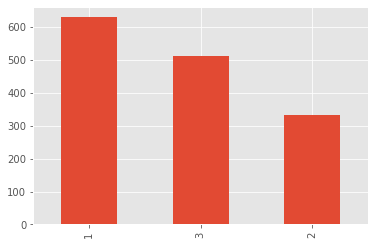

In [13]:
# Bar Plot
df['contraceptive_method_used'].value_counts().plot(kind="bar")

##### Narative
+ 1=No-use
+ 2=Long-term
+ 3=Short-term

Note: It is noticed that Most of the people did not use contraceptive

In [14]:
# Rename To Class
df.rename(columns={'contraceptive_method_used':'class'},inplace=True)

In [20]:
df.columns

Index(['wife's_age', 'wife's_education', 'husband's_education',
       'number_of_children_ever_born', 'wife's_religion',
       'wife's_now_working?', 'husband's_occupation',
       'standard-of-living_index', 'media_exposure', 'class'],
      dtype='object')

In [21]:
# Check for missing values
df.isnull().sum()

wife's_age                      0
wife's_education                0
husband's_education             0
number_of_children_ever_born    0
wife's_religion                 0
wife's_now_working?             0
husband's_occupation            0
standard-of-living_index        0
media_exposure                  0
class                           0
dtype: int64

In [22]:
# Profiling Dataset

import pandas_profiling as pp

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
dir(pp)

In [ ]:
pp.ProfileReport(df)

In [23]:
# Shape
df.shape

(1473, 10)

#### Features and Model Building

In [24]:
# Features
x = df.iloc[:,0:9]

In [25]:
# Labels
ylabels = df['class']

#### Split Dataset

In [44]:
# Split dataset
x_train,x_test,y_train,y_test = train_test_split(x,ylabels,test_size=0.33, random_state=42)

In [45]:
x_train.shape

(986, 9)

#### Models

In [46]:
# Logistic Regression
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [47]:
# Accuracy of our Model
round(logit.score(x_test,y_test)*100,3)

51.54

In [48]:
### Save Models
import joblib

In [49]:
cmc_logit_model = open("models/cmc_logit_model.pkl","wb")
joblib.dump(logit,cmc_logit_model)
cmc_logit_model.close()

In [50]:
# Naive Bays
nv = MultinomialNB()
nv.fit(x_train,y_train)

MultinomialNB()

In [51]:
round(nv.score(x_test,y_test)*100,3)

51.129

In [53]:
cmc_nv_model = open("cmc_nv_model.pkl","wb")
joblib.dump(nv,cmc_nv_model)
cmc_nv_model.close()

In [54]:
# Naive Bays
rf = RandomForestClassifier(n_estimators=100, max_depth=4)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=4)

In [55]:
round(rf.score(x_test,y_test)*100,3)

54.415

In [56]:
# Save Model
cmc_rf_model = open("cmc_rf_model.pkl","wb")
joblib.dump(rf,cmc_rf_model)
cmc_rf_model.close()

#### Cross Validation

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Using A Logistic regression Algorithm

In [31]:
cv_scores = cross_val_score(LogisticRegression(),x,ylabels,cv=10)

In [32]:
print(cv_scores)

[0.51351351 0.51351351 0.5        0.52380952 0.55782313 0.46938776
 0.56462585 0.53061224 0.44897959 0.49659864]


In [33]:
# Find the Mean of the Scores
print(np.mean(cv_scores))

0.5118863761720904


In [34]:
# Using A Random Forest Algorithm

In [35]:
cv_scores2 = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=2),x,ylabels,cv=10)

In [36]:
print(cv_scores2)

[0.49324324 0.52702703 0.47972973 0.45578231 0.4829932  0.48979592
 0.53061224 0.44897959 0.49659864 0.48979592]


In [37]:
# Find the Mean of the Scores
print(np.mean(cv_scores2))

0.4894557823129251


#### Model Interpretation

In [58]:
import eli5

Using TensorFlow backend.


In [60]:
# Showing the Weight for our model
eli5.show_weights(logit, top=10)

In [61]:
df['class'].unique()

array([1, 2, 3], dtype=int64)

#### Class keys
+ 1=No-use
+ 2=Long-term
+ 3=Short-term

In [62]:
class_names = ["No_use","Long_Term","Short_term"]

In [63]:
x.columns.tolist()

["wife's_age",
 "wife's_education",
 "husband's_education",
 'number_of_children_ever_born',
 "wife's_religion",
 "wife's_now_working?",
 "husband's_occupation",
 'standard-of-living_index',
 'media_exposure']

In [64]:
# Feature names
feature_names = x.columns.tolist()

In [66]:
# Clearly Define Feature Names
eli5.show_weights(logit,feature_names=feature_names,target_names=class_names)

In [67]:
# Show Explaination For A Single Prediction who is a short term user 3
eli5.show_prediction(logit, x_test.iloc[10],feature_names=feature_names,target_names=class_names)

In [68]:
x_test.iloc[10]

wife's_age                      33
wife's_education                 3
husband's_education              3
number_of_children_ever_born     8
wife's_religion                  1
wife's_now_working?              1
husband's_occupation             3
standard-of-living_index         4
media_exposure                   0
Name: 677, dtype: int64

In [69]:
# Number of Children Born Per Age Groups together
df.groupby("wife's_age")['number_of_children_ever_born'].count()

wife's_age
16     3
17     8
18     7
19    18
20    28
21    48
22    59
23    44
24    61
25    80
26    69
27    59
28    63
29    59
30    64
31    46
32    64
33    55
34    50
35    62
36    57
37    51
38    44
39    34
40    34
41    34
42    40
43    34
44    39
45    41
46    22
47    43
48    30
49    23
Name: number_of_children_ever_born, dtype: int64

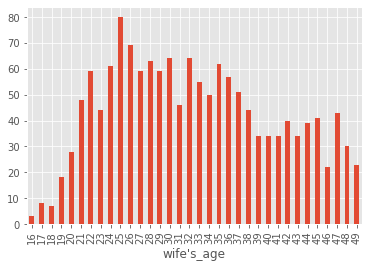

In [77]:
df.groupby("wife's_age")['number_of_children_ever_born'].count().plot(kind='bar')